# Goal
    Predicting the genre of songs based on the frequency of words in lyrics by k-nearest neighbor algorithm  

# Exploring Data 

We will use Datasets adapted from the Million Song Dataset
The data consists of
1. title of song
2. name of musical group
3. genre of song
   with songs from the Country and Hip-hop genres.


# Importing Packages 
1. numpy package for manipulations of arrays
2. matplotlib package for generating charts
3. pandas package for handling tables
4. helper function created in advance that generates charts with the seaborn package.

In [79]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import helper_functions

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (10,8)

# indicate paths to files

import os 
home = os.environ["HOME"]
path_to_data = f"{home}/lyrics.csv"
path_to_dictionary = f"{home}/words.csv"

# Loading Data 

In [80]:
lyrics = pd.read_csv(path_to_data)
lyrics.head(3)
#load the data into the table lyrics

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
0,Buried Alive,Hell Razah,Hip-hop,0.028395,...,0.0,0.0,0.0,0.0
1,Little Things,Danni Leigh,Country,0.024862,...,0.0,0.0,0.0,0.0
2,Open,Afu-Ra,Hip-hop,0.052198,...,0.0,0.0,0.0,0.0


Note that each song has a unique title. Besides Title, Artist and Genre, we have about 5000 columns corresponding to words. The columns indicate the frequency of the words in songs.

In [81]:
lyrics.loc[lyrics["Title"] == "In Your Eyes",['Title', 'Artist', 'Genre','like','love','the']]

,Title,Artist,Genre,like,love,the
962,In Your Eyes,Alison Krauss,Country,0.011905,0.059524,0.0


Here we have a few columns from the row for the country song "In Your Eyes" by Alison Krauss. The song contains 168 words. The word like appears two times
2/168≈0.0119
 
The word love appears 10 times
10/168≈0.0595
 
The word the does not appear in the song.

# Splitting  lyrics data into two datasets called training_set and testing_set

1. We will use training_set to determine an approach to classifying songs into genres.
2. We will compare the predicted genres and observed genres in the testing_set.
3. So training_set will help us to make classification and testing_set will help us to evaluate the classifications.
We assign 80% of data in training set and 20 % in testing dataset 

In [82]:
training_proportion = 0.8

number_songs = len(lyrics)
number_training = int(number_songs * training_proportion)

In [83]:
number_training 

1335

1. We need to ensure that the training_set and testing_set contain different songs. 
2. We should split the sets at random to avoid any patterns in the rows. 
    For example, we should not take the training_set to consist of Country songs and the testing_set to consist of Hip-hop songs.

In [84]:
lyrics_shuffled = lyrics.sample(frac = 1, random_state = 42)

training_set = lyrics_shuffled.iloc[:number_training]
testing_set = lyrics_shuffled.iloc[number_training:]

In [85]:
lyrics_shuffled

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
941,Bring It On Home To Me,Mickey Gilley,Country,0.052632,...,0.0,0.0,0.0,0.0
988,Early morning riser,Pure Prairie League,Country,0.033962,...,0.0,0.0,0.0,0.0
405,We Danced,Brad Paisley,Country,0.072289,...,0.0,0.0,0.0,0.0
722,When We All Get To Heaven,Brad Paisley,Country,0.000000,...,0.0,0.0,0.0,0.0
1614,Between The Daylight And The Dark,Mary Gauthier,Country,0.000000,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1130,Marijuano Locos (Stoned Raiders),Cypress Hill,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
1294,Pop A Top,Jim Ed Brown & The Browns,Country,0.067708,...,0.0,0.0,0.0,0.0
860,Maria,Kathleen Edwards,Country,0.068783,...,0.0,0.0,0.0,0.0
1459,Pa,Ryan Adams & The Cardinals,Country,0.021978,...,0.0,0.0,0.0,0.0


In [86]:
training_set

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
941,Bring It On Home To Me,Mickey Gilley,Country,0.052632,...,0.0,0.0,0.0,0.0
988,Early morning riser,Pure Prairie League,Country,0.033962,...,0.0,0.0,0.0,0.0
405,We Danced,Brad Paisley,Country,0.072289,...,0.0,0.0,0.0,0.0
722,When We All Get To Heaven,Brad Paisley,Country,0.000000,...,0.0,0.0,0.0,0.0
1614,Between The Daylight And The Dark,Mary Gauthier,Country,0.000000,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
658,I Can,Nas,Hip-hop,0.108876,...,0.0,0.0,0.0,0.0
1357,Sinequanon,Hybrid,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
1019,Taste This,Mýa,Hip-hop,0.051667,...,0.0,0.0,0.0,0.0
1599,Duck Sick,Compton's Most Wanted,Hip-hop,0.031293,...,0.0,0.0,0.0,0.0


In [87]:
testing_set

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
1565,Just Say She's A Rhymer,Mary Gauthier,Country,0.064327,...,0.0,0.0,0.0,0.0
283,John Walker's Blues,Steve Earle,Country,0.038462,...,0.0,0.0,0.0,0.0
797,My Baby Walked Right Out On Me,Wanda Jackson,Country,0.055046,...,0.0,0.0,0.0,0.0
1358,I Am a Man of Constant Sorrow,Alison Krauss & Union Station,Country,0.079602,...,0.0,0.0,0.0,0.0
225,Asd,ASD,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1130,Marijuano Locos (Stoned Raiders),Cypress Hill,Hip-hop,0.000000,...,0.0,0.0,0.0,0.0
1294,Pop A Top,Jim Ed Brown & The Browns,Country,0.067708,...,0.0,0.0,0.0,0.0
860,Maria,Kathleen Edwards,Country,0.068783,...,0.0,0.0,0.0,0.0
1459,Pa,Ryan Adams & The Cardinals,Country,0.021978,...,0.0,0.0,0.0,0.0


We randomly shuffled the rows of lyrics with the pandas function shuffle. However we get the same training_set and testing_set each time we split lyrics_shuffled

We want to ensure that training_set and testing_set have a mix of the genres. 
So we compute the proportion of Country songs in training_set and testing_set below.

In [88]:
Counts_T = 0
nonG = 0
for i in training_set['Genre']:
    if i == 'Country':
        Counts_T += 1
    else:
        nonG += 1 
proportion_country_training = Counts_T / (Counts_T + nonG)

Counts_Test = 0
nonG_Test = 0 
for j in testing_set['Genre']:
    if j == 'Country':
        Counts_Test += 1
    else:
        nonG_Test += 1 
proportion_country_testing = Counts_Test / (Counts_Test + nonG_Test)
proportion_country_testing

0.5508982035928144

Let's generate a bar-chart from the proportions.

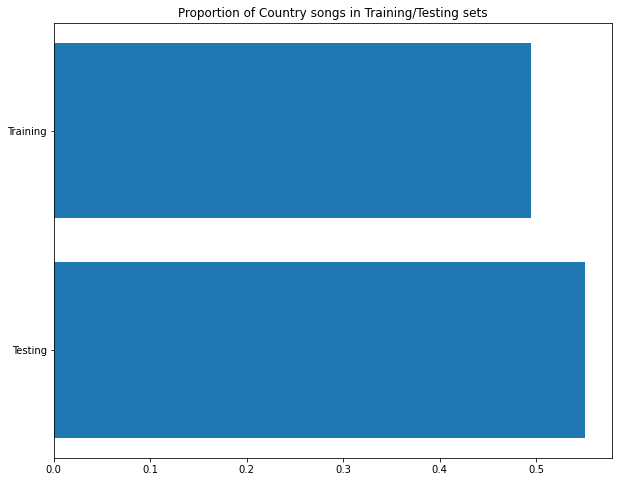

In [89]:
plt.barh(["Testing","Training"], [proportion_country_testing, proportion_country_training])
plt.title("Proportion of Country songs in Training/Testing sets");

# Use the k-nearest neighbors approach to classify songs

Each song in training_set and testing_set has a genre Country or Hip-hop for genre. However, we need to predict a genre for the songs in testing_set. If we want to classify a song in testing_set then we compare to the songs in training_set. We compare songs with the frequency of words. If the frequency of words in two songs are similar, then we expect the genre of the songs to be similar.

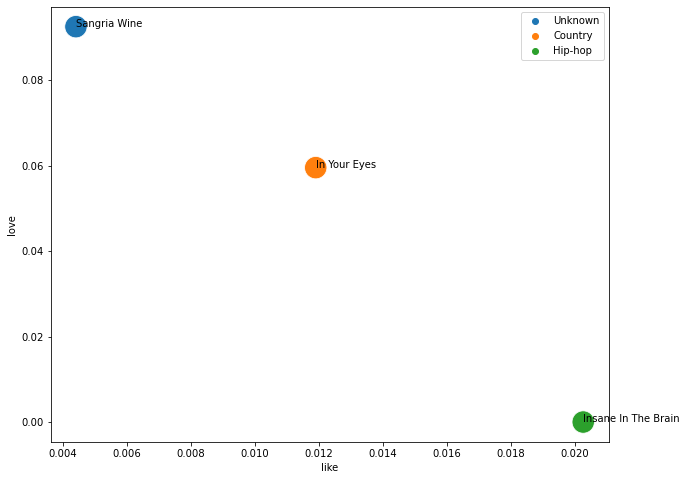

In [90]:
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

Here we have three songs
1. Sangria Wine in the testing set
2. In Your Eyes and Insane In The Brain in the training set
The genre of Sangria Wine is Country.

In [91]:
testing_set[testing_set["Title"] == "Sangria Wine"]

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
686,Sangria Wine,Jerry Jeff Walker,Country,0.088106,...,0.0,0.0,0.0,0.0


Based on the frequency of words in the lyrics, we want to predict the genre. We can compare the frequency of words in the lyrics of Sangria Wine to the lyrics of In Your Eyes and Insance In The Brain. Here we have the frequencies of the words like and love. We learn that Sangria Wine is closer to In Your Eyes than Insane in the Brain. So we would correctly classifiy Sangria Wine as Country based on the words like and love.

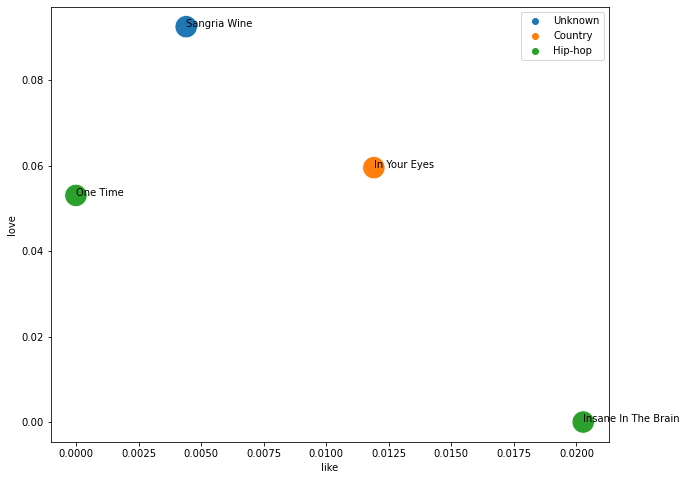

In [92]:
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "One Time", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

We have many other songs in the training set. The song One Time in the Hip-hop genres seems close to Sangria Wine based on frequency of the words like and love in the lyrics.

Let's caluclate the distance between the songs to determine the genre of the song 

In [93]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",["like","love"]]

distance = np.sum((sangria_wine.values - in_your_eyes.values)**2)
distance = np.sqrt(distance)

distance

0.03382894432459689

In [94]:
one_time = training_set.loc[training_set["Title"] == "One Time", ["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine", ["like","love"]]

distance = np.sum((sangria_wine.values - one_time.values)**2)
distance = np.sqrt(distance)

distance

0.03972572223189776

We learn that In Your Eyes is closer to Sangria Wine than One Time. 
So we would correctly predict that Sangria Wine is Country genre based on the frequency of the words like and love

If we have many words to determine the genre of songs, we will need to write a function caculates the distance between two songs based on a collection of word. 
Let's write a function "distance_two_songs" 
with input

row_1 : row in table corresponding to song 1
row_2 : row in table corresponding to song 2
words : list of words
and output the distance between the songs.

In [95]:
def distance_two_songs(row_1, row_2, words):
    coordinates_1 = row_1[words]
    coordinates_2 = row_2[words]

    distance = np.sum((coordinates_1.values - coordinates_2.values)**2)
    distance = np.sqrt(distance)
    
    return distance

Now we can compute the distance between In Your Eyes and Sangria Wine based on the words ["like","love","the"]

In [96]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",:] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",:]

q2_1 = distance_two_songs(in_your_eyes,sangria_wine,["like","love",'the'])

q2_1

0.040367822490959014

If we want to classify a song in testing_set then we need to compute distance to the songs in the training_set. Having written a function to compute the distance between two songs, we need to repeatedly use the function on training_set. We have a helper function compute_distances(written in files ahead) 
with input

row : row in table corresponding to song
training_set : table containing songs in training_set
words : list of words
and output array of distances.
The output contains a number for each song in testing_set.

In [97]:
words = ["like", "love", "the"]
row = testing_set.loc[testing_set["Title"] == "Sangria Wine", :]

distance = helper_functions.compute_distances(row, training_set, words)
distance

array([0.09519904, 0.07280497, 0.1000939 , ..., 0.0892561 , 0.09677655,
       0.09382014])

Adding the distances to a copy of training_set.

In [98]:
training_set_with_distance = training_set.copy()
training_set_with_distance["distance"] = distance
training_set_with_distance.head()

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
941,Bring It On Home To Me,Mickey Gilley,Country,0.052632,...,0.0,0.0,0.0,0.095199
988,Early morning riser,Pure Prairie League,Country,0.033962,...,0.0,0.0,0.0,0.072805
405,We Danced,Brad Paisley,Country,0.072289,...,0.0,0.0,0.0,0.100094
722,When We All Get To Heaven,Brad Paisley,Country,0.000000,...,0.0,0.0,0.0,0.098729
1614,Between The Daylight And The Dark,Mary Gauthier,Country,0.000000,...,0.0,0.0,0.0,0.124163


We can find out that the closest song to Sangria Wine based on the frequency of the words ["like", "love", "the"] and its genre

In [99]:
number = training_set_with_distance['distance'] == training_set_with_distance['distance'].min()

q2_2_1 = training_set_with_distance.loc[number,'Title'].values
q2_2_1

array(["I'm In Love"], dtype=object)

In [100]:
number = training_set_with_distance['distance'] == training_set_with_distance['distance'].min()

q2_2_1 = training_set_with_distance.loc[number,'Genre']
q2_2_1

331    Hip-hop
Name: Genre, dtype: object

We noticed that the nearest point might have the wrong genre since we know the correct genre is "country" 

So we should study many nearby points. 
We fix an odd number  𝑘  like  3,5,7,… . 
We will calculate the  𝑘  nearest points in the training_set to the song in the testing_set. 
Among the  𝑘  nearest points will count the number of Country and Hip-hop songs.

1. If we have more Country than Hip-hop then we will clasify the song as Country
2. If we have more Hip-hop than Country then we will clasify the song as Hip-hop
3. Note that we use the same number  𝑘  throughout the classification. 
4. We will evaluate the prediction to determine a choice of  𝑘 .


Firstly, We take the 15 songs closest to Sangria Wine.

In [101]:
training_set_with_distance_top_15 = training_set_with_distance.sort_values("distance", ascending = True).head(15)
training_set_with_distance_top_15

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
331,I'm In Love,"Evelyn Champagne"" King""",Hip-hop,0.052045,...,0.0,0.0,0.0,0.013627
1061,Your Love Gets Sweeter,Finley Quaye,Hip-hop,0.029536,...,0.0,0.0,0.0,0.021870
1534,All My Love,112,Hip-hop,0.020073,...,0.0,0.0,0.0,0.022150
810,Baby Love,MC Solaar,Hip-hop,0.000000,...,0.0,0.0,0.0,0.022844
464,True Love Ways,Mickey Gilley,Country,0.032520,...,0.0,0.0,0.0,0.028413
...,...,...,...,...,...,...,...,...,...
409,Tumbling Down,Allison Moorer,Country,0.008130,...,0.0,0.0,0.0,0.037901
1049,Dear Life,Anthony Hamilton,Hip-hop,0.054795,...,0.0,0.0,0.0,0.038197
232,When Love Finds You,Vince Gill,Country,0.000000,...,0.0,0.0,0.0,0.039807
1403,The Hardest Part,Allison Moorer,Country,0.007143,...,0.0,0.0,0.0,0.039982


In [102]:
count_country_nearest_neighbors = np.sum(training_set_with_distance_top_15['Genre'] == 'Country')
count_hiphop_nearest_neighbors = np.sum(training_set_with_distance_top_15['Genre'] == 'Hip-hop')
if count_country_nearest_neighbors > count_hiphop_nearest_neighbors:
    print ('Country')
else:
    print ('HipHop')

Country


we classify Sangria Wine based on the genres of the nearest 15 songs as Country 

# Finding the genre by computing the mode meaning the most common value

The function compute_mode has input

column : string indicating columns of the table
table : table containing data
and output the mode of a column in a table.

In [103]:
def compute_mode(column, table):
    return table[column].mode().values[0]


Use compute_mode on the following table to predict the genre of Sangria Wine based on the 31 nearest songs.

In [104]:
training_set_with_distance_top_31 = training_set_with_distance.sort_values("distance", ascending = True).head(31)
q4_2 = compute_mode("Genre",training_set_with_distance_top_31)
q4_2

'Country'

We have been working with the words ["like", "love", "the"]. However, we need to choose words that help us to differentiate between genres. 
Based on common words in the Country and Hip-hop genres,let's try the words ["street","style","truck","lone"].

In [105]:
words = ["like","love","the","street","style","truck","lone"]
training_set_with_distance = training_set.copy() 
#make a copy of the training set. We will add a column with the distance to a song in the testing set.
k = 15
#take k = 15
predictions = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions.append(prediction)

Checking how many songs classified Country and Hip-hop

In [106]:
count_country_testing = 0
count_hiphop_testing = 0

for i in predictions:
    if i == "Country":
        count_country_testing += 1
    else:
        count_hiphop_testing += 1
count_country_testing 

196

# The Accuracy Rate of the Predictions When k = 15

In [107]:
testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions
testing_set_with_predictions.head(3)
#add predictions to a copy of testing_set.

,Title,Artist,Genre,i,...,pe,gee,colleg,predictions
1565,Just Say She's A Rhymer,Mary Gauthier,Country,0.064327,...,0.0,0.0,0.0,Country
283,John Walker's Blues,Steve Earle,Country,0.038462,...,0.0,0.0,0.0,Hip-hop
797,My Baby Walked Right Out On Me,Wanda Jackson,Country,0.055046,...,0.0,0.0,0.0,Country


In [108]:
testing_set_with_predictions

,Title,Artist,Genre,i,...,pe,gee,colleg,predictions
1565,Just Say She's A Rhymer,Mary Gauthier,Country,0.064327,...,0.0,0.0,0.0,Country
283,John Walker's Blues,Steve Earle,Country,0.038462,...,0.0,0.0,0.0,Hip-hop
797,My Baby Walked Right Out On Me,Wanda Jackson,Country,0.055046,...,0.0,0.0,0.0,Country
1358,I Am a Man of Constant Sorrow,Alison Krauss & Union Station,Country,0.079602,...,0.0,0.0,0.0,Country
225,Asd,ASD,Hip-hop,0.000000,...,0.0,0.0,0.0,Hip-hop
...,...,...,...,...,...,...,...,...,...
1130,Marijuano Locos (Stoned Raiders),Cypress Hill,Hip-hop,0.000000,...,0.0,0.0,0.0,Hip-hop
1294,Pop A Top,Jim Ed Brown & The Browns,Country,0.067708,...,0.0,0.0,0.0,Hip-hop
860,Maria,Kathleen Edwards,Country,0.068783,...,0.0,0.0,0.0,Country
1459,Pa,Ryan Adams & The Cardinals,Country,0.021978,...,0.0,0.0,0.0,Hip-hop


Let's compare Genre column with prediction column 

In [109]:
accuracy = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
accuracy

0.6706586826347305

We find that 67% of the classification are correct.
Try different k value to check correction rate differences. 

# The Accuracy Rate of the Predictions When k = 13

In [110]:
words = ["like","love","the","street","style","truck","lone"]
training_set_with_distance = training_set.copy()
k = 31
predictions = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions.append(prediction)
testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions
q5_2 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
q5_2



0.6586826347305389

# The Accuracy Rate of the Predictions When k = 7

In [111]:
words = ["like","love","the","street","style","truck","lone"]
training_set_with_distance = training_set.copy()
k = 7
predictions = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions.append(prediction)
testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions
q5_3 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
q5_3

0.6916167664670658

# Visualize Accuracy Rates for Different Choices of  𝑘 

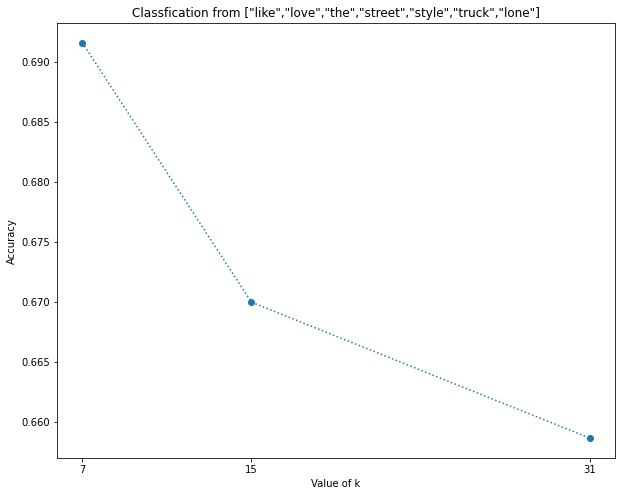

In [112]:
plt.plot([7,15,31], [q5_3,0.67,q5_2], "o:")

plt.xticks([7,15,31])
plt.ylabel("Accuracy")
plt.xlabel("Value of k")

plt.title('Classfication from ["like","love","the","street","style","truck","lone"]');

We learn that  𝑘=7  give the most accurate classifications. 
Also, if we experimented with the collection of words, then we would be able to make even more accurate classfications!